In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
students = pd.read_csv('./StudentsPerformance.csv')

In [69]:
students.head(10) # 테이블 상위10개 확인하기

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


### 상관계수 확인하고 히트맵 그리기

In [6]:
students.corr() #과목별 상관계수 확인 => 수확은 관련이 없는데 reading 을 잘한 학생은 writing 점수도 높음 

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


<AxesSubplot:>

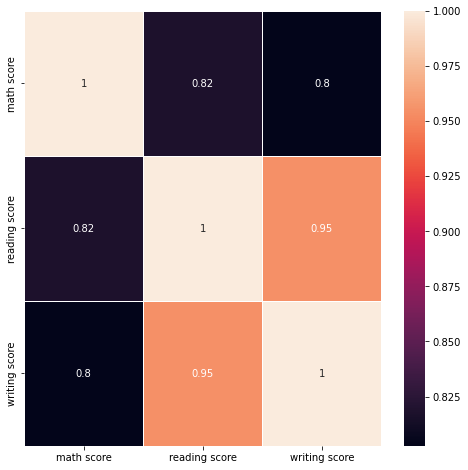

In [7]:
plt.figure(figsize=(8,8))
sns.heatmap(students.corr(), annot=True, linewidths = .5)

### 상관계수 kdeplot 으로 plotting

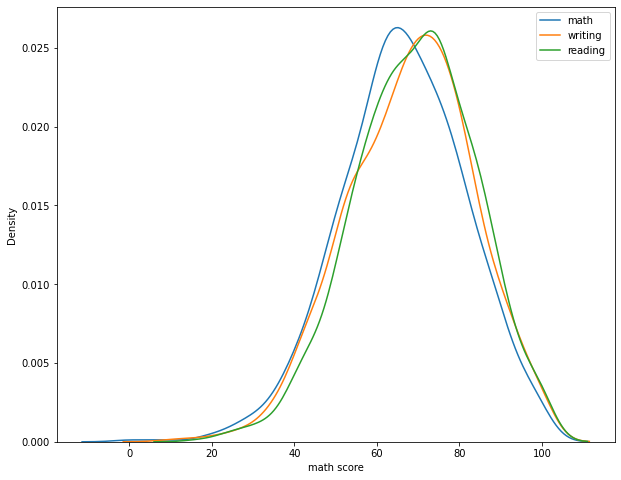

In [71]:
# kdeplot 으로 확인하기

fig , ax = plt.subplots(1, 1, figsize=(10,8))
sns.kdeplot(x=students['math score'], ax = ax)
sns.kdeplot(x=students["writing score"], ax = ax)
sns.kdeplot(x=students["reading score"], ax = ax)

plt.legend(['math', 'writing', 'reading'])

plt.show()

### Test preparation course 에 따른 시험 평균 점수

C:\Users\dbsdm\AppData\Local\Temp/ipykernel_8428/3854453431.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sns.kdeplot(x = students[students['test preparation course'] == 'none'].mean(), ax = ax)
C:\Users\dbsdm\AppData\Local\Temp/ipykernel_8428/3854453431.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  sns.kdeplot(x = students[students['test preparation course'] == 'completed'].mean(), ax= ax)


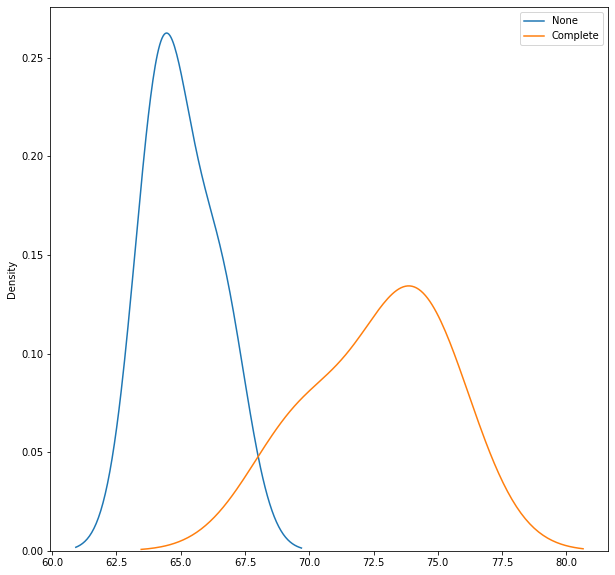

In [65]:

fig ,ax = plt.subplots(1,1, figsize = (10,10))
sns.kdeplot(x = students[students['test preparation course'] == 'none'].mean(), ax = ax)
sns.kdeplot(x = students[students['test preparation course'] == 'completed'].mean(), ax= ax)

plt.legend(['None', 'Complete'])
plt.show()

### Bar plot

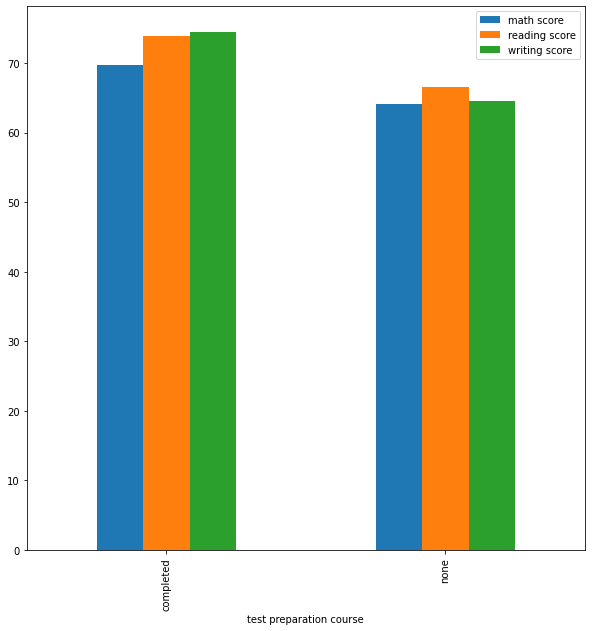

In [66]:
students.groupby(['test preparation course']).mean().plot(kind='bar', figsize = (10,10))

plt.show()
#준비한 학생과 안한 학생의 차이가 보임

### Parental level of education 에 따른 시험 평균 점수

<AxesSubplot:xlabel='parental level of education'>

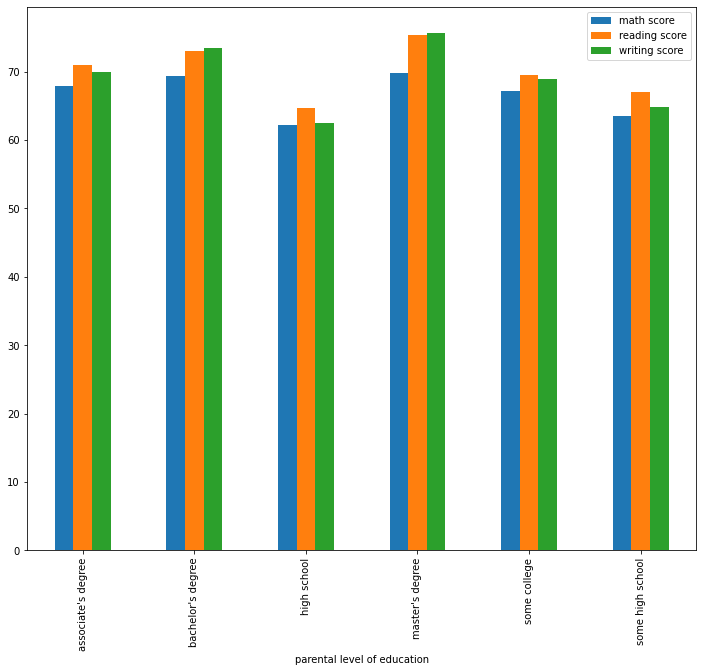

In [68]:
students.groupby(['parental level of education']).mean().plot(kind='bar',figsize = (12,10)) 
#부모의 학위별 과목 평균 점수 -> master's degree 가가 평균 점수가 높음이 보여짐

### Gender 별 과목 평균 점수 비교

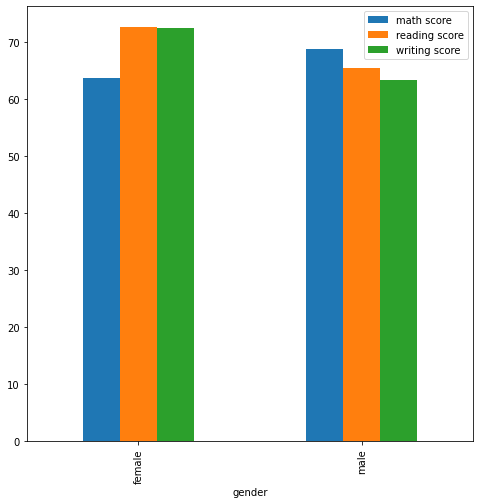

In [43]:
students.groupby(['gender']).mean().plot(kind='bar', figsize = (8,8))

plt.show()
#female 은 reading,writing 우수하고 math 평균이 낮음
# male 은 math 성적이 우수하고 reading,writing 평균이 낮음